<a href="https://colab.research.google.com/github/thumb-chuu/BigData-Internship_statistics/blob/main/%EC%97%84%EC%A7%80%EC%88%98_%EC%8B%A4%EC%8A%B5(2)%EC%9D%B4%EC%82%B0%ED%99%95%EB%A5%A0%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ◆ 이산확률분포 실습

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 67 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 패키지 임포트
import os
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd                 # pandas package
import numpy as np                  # numpy package
from scipy import stats             # Scipy Package

# 시각화 패키지
import matplotlib.pyplot as plt     # matplotlib 시각화 패키지
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :
    font_family = "NanumBarunGothic" # Windows OS 
else :
    font_family = "NanumBarunGothic" # MAC OS
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

# ◆ 이산확률분포 실습
### 2. 이산확률분포
### 1) 베르누이분포
### - 확률론과 통계학에서 매 시행마다 오직 두 가지의 가능한 결과만 일어난다고 할 때, 이러한 실험을 1회 시행하여 일어난 두 가지 결과에 의해 그 값이 각각 0과 1로 결정되는 확률분포
### stats.bernoulli() : 베르누이 확률 변수 클래스

In [ ]:
# 베르누이분포 정의
mu = 0.7
bern = stats.bernoulli(mu)

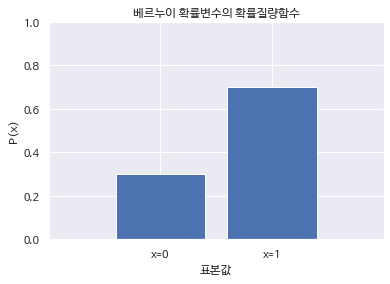

In [ ]:
## 확률질량함수 계산 및 시각화
b_x = [0, 1]
bern_pmf = bern.pmf(b_x)

# 시각화
plt.bar(b_x, bern_pmf)
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률질량함수")
plt.show()

In [ ]:
# 베르누이 검정을 위한 베르누이 샘플 100개 생성
x_sample_bern = bern.rvs(100, random_state=0)

In [ ]:
x_sample_bern

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
# 베르누이 시뮬레이션
y_bern = np.bincount(x_sample_bern, minlength=2) / float(len(x_sample_bern))

df_bern = pd.DataFrame({"결과": bern_pmf, "검증(시뮬레이션)": y_bern})
df_bern.index = [0, 1]
df_bern

,결과,검증(시뮬레이션)
0,0.3,0.23
1,0.7,0.77


### 2. 이산확률분포
### 2) 이항분포
### - '성공'에 해당하는 사상이 출현할 확률이 p인 똑같은 베르누이시행을 독립적으로 n번 반복해서 시행하여 일어난 두 가지 결과에 의해 그 값이 각각 0과 1로 결정되는 확률분포
### stats.binom.pmf(성공횟수, n='실험 횟수', p='성공확률')

In [ ]:
## scipy 이항분포 확률질량함수 계산

# 0.3의 확률을 갖는 15회의 실험에서 3회 성공할 확률 반환
print("k=3, n=15, p=0.3의 PMF:", stats.binom.pmf(3, n=15, p=0.3))

# 0.3의 확률을 갖는 15회의 실험에서 0~4회 성공할 확률의 누적값 반환
print("k=0~4, n=15, p=0.3의 PMF:", stats.binom.cdf(4, n=15, p=0.3))

k=3, n=15, p=0.3의 PMF: 0.17004021326428578
k=0~4, n=15, p=0.3의 PMF: 0.5154910592268429


In [ ]:
# p의 확률을 갖는 n회의 시행에서 k회 성공할 (일어날) 확률을 반환하는 함수 생성
def bion_dist(k, n, p) :
    pmf_bion = stats.binom.pmf(k, n = n, p = p)
    return pmf_bion

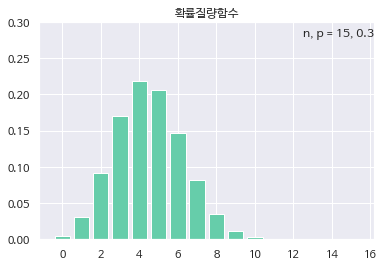

In [ ]:
# 0~15 범위 생성 : 성공 횟수
x = np.arange(0, 16)

# 확률질량함수의 값 array
pdf_result = [bion_dist(k, 15, 0.3) for k in range(0,16)]

# 시각화
plt.title("확률질량함수")
plt.ylim(0, 0.3)
plt.text(12.5, 0.28, 'n, p = 15, 0.3')
plt.bar(x, pdf_result, color='mediumaquamarine')
# plt.plot(x, pdf_result, color='lightcoral')
plt.show()

### 2. 이산확률분포
### 3) 포아송분포
### - 어떤 단위 시간 동안 발생한 사건 횟수를 x라 했을 때 확률분포
### - stats.poisson.pmf(n='시행수', lamb='평균 발생 수:기대값')
### - n회의 사건이 일어날 확률을 반환

In [ ]:
# scipy 포아송 함수
# 3번의 시행에서 평균 사건 수(기대값 2)에 대한 발생 확률
stats.poisson.pmf(3, 2, loc=0)

0.18044704431548356

In [ ]:
# n번의 시행에서 평균 사건 수(기대값, 람다)에 대한 발생 확률 함수
def pois_dist(n, lamb):
    pmf_poi = stats.poisson.pmf(n, lamb, loc=0)
    return pmf_poi

In [ ]:
# 확률질량함수의 값 array
x = np.arange(0, 41)
poi_pdf_result = [pois_dist(n, 10) for n in range(0, 41)]

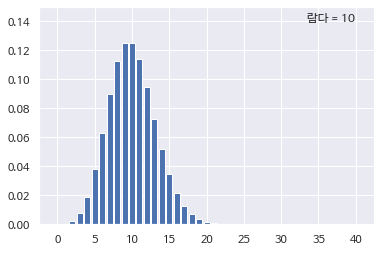

In [ ]:
plt.ylim(0, 0.15)
plt.text(33.5, 0.14, '람다 = 10')
plt.bar(x, poi_pdf_result)
plt.show()

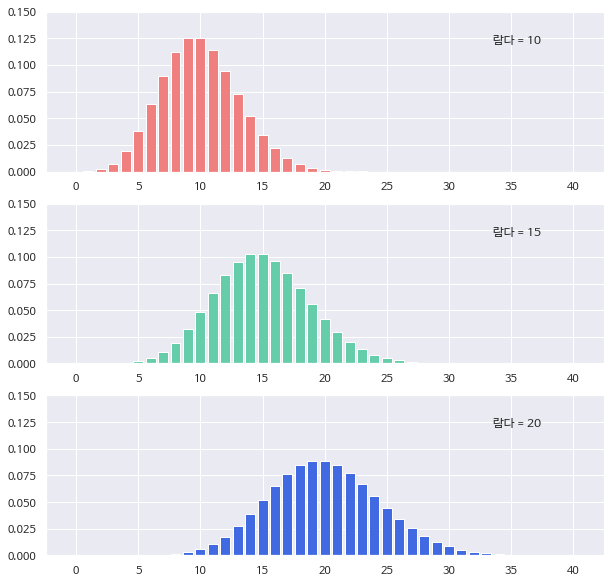

In [ ]:
## 기대값에 따른 포아송분포 차이 확인

x = np.arange(0, 41)

fig = plt.figure(figsize = (10,10))

fig.add_subplot(3, 1, 1)
pmf_poin1 = np.array([pois_dist(n, 10) for n in range(0, 41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12, '람다 = 10')
plt.bar(x, pmf_poin1, color='lightcoral')

fig.add_subplot(3, 1, 2)
pmf_poin2 = np.array([pois_dist(n, 15) for n in range(0, 41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12, '람다 = 15')
plt.bar(x, pmf_poin2, color='mediumaquamarine')

fig.add_subplot(3, 1, 3)
pmf_poin3 = np.array([pois_dist(n, 20) for n in range(0, 41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12, '람다 = 20')
plt.bar(x, pmf_poin3, color='royalblue')

plt.show()